<a href="https://colab.research.google.com/github/Ekram49/DS-Unit-1-Build/blob/master/Cricket_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Goal
It is said that The indian cricket team tends to do well when they play at their home-ground, but struggles when playing abroad. That's why they are often called 'Tigers at home, lambs abroad'. I'm gonna try to figure out if that's the case for only India, or other countries suffer over-seas too?

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Loading data

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/Ekram49/DS-Unit-1-Build/master/ContinousDataset.csv')
df.head()

,Unnamed: 0,Scorecard,Team 1,Team 2,Margin,Ground,Match Date,Winner,Host_Country,Venue_Team1,Venue_Team2,Innings_Team1,Innings_Team2
0,0,ODI # 1,Australia,England,Winner2ndInning,Melbourne,"Jan 5, 1971",Australia,Australia,Home,Away,Second,First
1,1,ODI # 2,England,Australia,Winner2ndInning,Manchester,"Aug 24, 1972",England,England,Home,Away,Second,First
2,2,ODI # 3,England,Australia,Winner2ndInning,Lord's,"Aug 26, 1972",Australia,England,Home,Away,First,Second
3,3,ODI # 4,England,Australia,Winner2ndInning,Birmingham,"Aug 28, 1972",England,England,Home,Away,Second,First
4,4,ODI # 5,New Zealand,Pakistan,Winner1stInning,Christchurch,"Feb 11, 1973",New Zealand,New Zealand,Home,Away,First,Second


In [4]:
df = df.rename(columns={"Team 1": "Team_1", "Team 2": "Team_2",
                   "Team 1": "Team_1","Match Date":"Match_Date"})
df.head()

,Unnamed: 0,Scorecard,Team_1,Team_2,Margin,Ground,Match_Date,Winner,Host_Country,Venue_Team1,Venue_Team2,Innings_Team1,Innings_Team2
0,0,ODI # 1,Australia,England,Winner2ndInning,Melbourne,"Jan 5, 1971",Australia,Australia,Home,Away,Second,First
1,1,ODI # 2,England,Australia,Winner2ndInning,Manchester,"Aug 24, 1972",England,England,Home,Away,Second,First
2,2,ODI # 3,England,Australia,Winner2ndInning,Lord's,"Aug 26, 1972",Australia,England,Home,Away,First,Second
3,3,ODI # 4,England,Australia,Winner2ndInning,Birmingham,"Aug 28, 1972",England,England,Home,Away,Second,First
4,4,ODI # 5,New Zealand,Pakistan,Winner1stInning,Christchurch,"Feb 11, 1973",New Zealand,New Zealand,Home,Away,First,Second


# Functions
In the data set there is no straight-forward data for indivisual teams where the information of their winning ratio at home and winning ratio away is given. So I'm gonna try to acquire the data from my data set.

The first step would be to write some functions which will help me figure out the team's winning and losing record both home and away.

In [0]:
# Team won at home

def df_team_Country_win_home(country):
  return df[(((df['Team_1'] == country) | (df['Team_2'] == country)) & (df['Winner'] == country) & (df['Host_Country'] == country))]

In [0]:
# Team lost at home

def df_team_Country_lost_home(country):
  return df[(((df['Team_1'] == country) | (df['Team_2'] == country)) & (df['Winner'] != country) & (df['Host_Country'] == country))]

In [0]:
# Team won away

def df_team_Country_win_away(country):
  return df[(((df['Team_1'] == country) | (df['Team_2'] == country)) & (df['Winner'] == country) & (df['Host_Country'] != country))]

In [0]:
# Team lost away

def df_team_Country_lost_away(country):
  return df[(((df['Team_1'] == country) | (df['Team_2'] == country)) & (df['Winner'] != country) & (df['Host_Country'] != country))]

# Applying the function
Now I'm gonna apply my function to the top 10 ranked teams indivisually to figure out the amount matches they won/loss at home/away. If I can find these information then I can also find their winning ratio in both home and away.

# England

In [9]:
# England won at home
df_team_Country_win_home('England').head()

,Unnamed: 0,Scorecard,Team_1,Team_2,Margin,Ground,Match_Date,Winner,Host_Country,Venue_Team1,Venue_Team2,Innings_Team1,Innings_Team2
1,1,ODI # 2,England,Australia,Winner2ndInning,Manchester,"Aug 24, 1972",England,England,Home,Away,Second,First
3,3,ODI # 4,England,Australia,Winner2ndInning,Birmingham,"Aug 28, 1972",England,England,Home,Away,Second,First
5,5,ODI # 6,England,New Zealand,Winner2ndInning,Swansea,"Jul 18, 1973",England,England,Home,Away,Second,First
6,6,ODI # 8,England,West Indies,Winner2ndInning,Leeds,"Sep 5, 1973",England,England,Home,Away,Second,First
10,10,ODI # 12,England,India,Winner2ndInning,Leeds,"Jul 13, 1974",England,England,Home,Away,Second,First


In [10]:
# Number of win at home
eng_w_h = df_team_Country_win_home('England').shape[0]
eng_w_h

320

In [11]:
# England lost at home
df_team_Country_lost_home('England').head()

,Unnamed: 0,Scorecard,Team_1,Team_2,Margin,Ground,Match_Date,Winner,Host_Country,Venue_Team1,Venue_Team2,Innings_Team1,Innings_Team2
2,2,ODI # 3,England,Australia,Winner2ndInning,Lord's,"Aug 26, 1972",Australia,England,Home,Away,First,Second
7,7,ODI # 9,England,West Indies,Winner2ndInning,The Oval,"Sep 7, 1973",West Indies,England,Home,Away,First,Second
12,12,ODI # 14,England,Pakistan,Winner2ndInning,Nottingham,"Aug 31, 1974",Pakistan,England,Home,Away,First,Second
13,13,ODI # 15,England,Pakistan,Winner2ndInning,Birmingham,"Sep 3, 1974",Pakistan,England,Home,Away,First,Second
27,27,ODI # 31,England,Australia,Winner2ndInning,Leeds,"Jun 18, 1975",Australia,England,Home,Away,First,Second


In [12]:
# Number of loss at home
eng_l_h = df_team_Country_lost_home('England').shape[0]
eng_l_h

220

In [13]:
# Winning ratio at home********************************
eng_w_h_r = round(((eng_w_h) / (eng_w_h + eng_l_h)) * 100, 2)
eng_w_h_r

59.26

In [14]:
# England won away
df_team_Country_win_away('England').head()

,Unnamed: 0,Scorecard,Team_1,Team_2,Margin,Ground,Match_Date,Winner,Host_Country,Venue_Team1,Venue_Team2,Innings_Team1,Innings_Team2
14,14,ODI # 16,Australia,England,Winner2ndInning,Melbourne,"Jan 1, 1975",England,Australia,Home,Away,First,Second
41,41,ODI # 45,Pakistan,England,Winner2ndInning,Sahiwal,"Dec 23, 1977",England,Pakistan,Home,Away,First,Second
42,42,ODI # 46,Pakistan,England,Winner2ndInning,Sialkot,"Dec 30, 1977",England,Pakistan,Home,Away,First,Second
52,53,ODI # 58,Australia,England,Winner2ndInning,Melbourne,"Jan 24, 1979",England,Australia,Home,Away,First,Second
70,71,ODI # 76,England,West Indies,Winner1stInning,Sydney,"Nov 28, 1979",England,Australia,Neutral,Neutral,First,Second


In [15]:
# Number of win away
eng_w_a = df_team_Country_win_away('England').shape[0]
eng_w_a

366

In [16]:
# England lost Away
df_team_Country_lost_away('England').head()

,Unnamed: 0,Scorecard,Team_1,Team_2,Margin,Ground,Match_Date,Winner,Host_Country,Venue_Team1,Venue_Team2,Innings_Team1,Innings_Team2
0,0,ODI # 1,Australia,England,Winner2ndInning,Melbourne,"Jan 5, 1971",Australia,Australia,Home,Away,Second,First
43,43,ODI # 47,Pakistan,England,Winner1stInning,Lahore,"Jan 13, 1978",Pakistan,Pakistan,Home,Away,First,Second
53,54,ODI # 59,Australia,England,Winner2ndInning,Melbourne,"Feb 4, 1979",Australia,Australia,Home,Away,Second,First
54,55,ODI # 60,Australia,England,Winner2ndInning,Melbourne,"Feb 7, 1979",Australia,Australia,Home,Away,Second,First
75,76,ODI # 81,England,West Indies,Winner2ndInning,Brisbane,"Dec 23, 1979",West Indies,Australia,Neutral,Neutral,First,Second


In [17]:
# Number of loss away
eng_l_a = df_team_Country_lost_away('England').shape[0]
eng_l_a

422

In [18]:
# Winning ratio away****************************
eng_w_a_r = round(((eng_w_a) / (eng_w_a + eng_l_a)) * 100, 2)
eng_w_a_r

46.45

# India

In [19]:
# India won at home
df_team_Country_win_home('India').head()

,Unnamed: 0,Scorecard,Team_1,Team_2,Margin,Ground,Match_Date,Winner,Host_Country,Venue_Team1,Venue_Team2,Innings_Team1,Innings_Team2
124,125,ODI # 131,India,England,Winner2ndInning,Jalandhar,"Dec 20, 1981",India,India,Home,Away,Second,First
136,137,ODI # 143,India,England,Winner2ndInning,Cuttack,"Jan 27, 1982",India,India,Home,Away,Second,First
149,150,ODI # 156,India,Sri Lanka,Winner1stInning,Amritsar,"Sep 12, 1982",India,India,Home,Away,First,Second
150,151,ODI # 157,India,Sri Lanka,Winner2ndInning,Delhi,"Sep 15, 1982",India,India,Home,Away,Second,First
152,153,ODI # 159,India,Sri Lanka,Winner2ndInning,Bengaluru,"Sep 26, 1982",India,India,Home,Away,Second,First


In [20]:
# Number of win at home
ind_w_h = df_team_Country_win_home('India').shape[0]
ind_w_h

358

In [21]:
# India lost at home
df_team_Country_lost_home('India').head()

,Unnamed: 0,Scorecard,Team_1,Team_2,Margin,Ground,Match_Date,Winner,Host_Country,Venue_Team1,Venue_Team2,Innings_Team1,Innings_Team2
118,119,ODI # 125,India,England,Winner2ndInning,Ahmedabad,"Nov 25, 1981",England,India,Home,Away,First,Second
216,217,ODI # 226,India,West Indies,Winner1stInning,Srinagar,"Oct 13, 1983",West Indies,India,Home,Away,Second,First
217,218,ODI # 227,India,West Indies,Winner2ndInning,Vadodara,"Nov 9, 1983",West Indies,India,Home,Away,First,Second
218,219,ODI # 228,India,West Indies,Winner2ndInning,Indore,"Dec 1, 1983",West Indies,India,Home,Away,First,Second
219,220,ODI # 229,India,West Indies,Winner1stInning,Jamshedpur,"Dec 7, 1983",West Indies,India,Home,Away,Second,First


In [22]:
# Number of loss at home
ind_l_h = df_team_Country_lost_home('India').shape[0]
ind_l_h

232

In [23]:
# Winning ratio at home*********************
ind_w_h_r = round(((ind_w_h) / (ind_w_h + ind_l_h)) * 100, 2)
ind_w_h_r

60.68

In [24]:
# India won away
df_team_Country_win_away('India').head()

,Unnamed: 0,Scorecard,Team_1,Team_2,Margin,Ground,Match_Date,Winner,Host_Country,Venue_Team1,Venue_Team2,Innings_Team1,Innings_Team2
20,20,ODI # 24,East Africa,India,Winner2ndInning,Leeds,"Jun 11, 1975",India,England,Neutral,Neutral,First,Second
50,50,ODI # 54,Pakistan,India,Winner1stInning,Quetta,"Oct 1, 1978",India,Pakistan,Home,Away,Second,First
91,92,ODI # 97,Australia,India,Winner1stInning,Melbourne,"Dec 6, 1980",India,Australia,Home,Away,Second,First
93,94,ODI # 99,India,New Zealand,Winner1stInning,Perth,"Dec 9, 1980",India,Australia,Neutral,Neutral,First,Second
97,98,ODI # 103,India,New Zealand,Winner1stInning,Adelaide,"Dec 23, 1980",India,Australia,Neutral,Neutral,First,Second


In [25]:
# Number of win away
ind_w_a = df_team_Country_win_away('India').shape[0]
ind_w_a

592

In [26]:
# India lost Away
df_team_Country_lost_away('India').head()

,Unnamed: 0,Scorecard,Team_1,Team_2,Margin,Ground,Match_Date,Winner,Host_Country,Venue_Team1,Venue_Team2,Innings_Team1,Innings_Team2
10,10,ODI # 12,England,India,Winner2ndInning,Leeds,"Jul 13, 1974",England,England,Home,Away,Second,First
11,11,ODI # 13,England,India,Winner2ndInning,The Oval,"Jul 15-16, 1974",England,England,Home,Away,Second,First
15,15,ODI # 19,England,India,Winner1stInning,Lord's,"Jun 7, 1975",England,England,Home,Away,First,Second
24,24,ODI # 28,India,New Zealand,Winner2ndInning,Manchester,"Jun 14, 1975",New Zealand,England,Neutral,Neutral,First,Second
31,31,ODI # 35,New Zealand,India,Winner2ndInning,Christchurch,"Feb 21, 1976",New Zealand,New Zealand,Home,Away,Second,First


In [27]:
# Number of loss away
ind_l_a = df_team_Country_lost_away('India').shape[0]
ind_l_a

578

In [28]:
# Winning ratio away****************************
ind_w_a_r = round(((ind_w_a) / (ind_w_a + ind_l_a)) * 100, 2)
ind_w_a_r

50.6

# New Zealand

In [29]:
# New Zealand won at home
df_team_Country_win_home('New Zealand').head()

,Unnamed: 0,Scorecard,Team_1,Team_2,Margin,Ground,Match_Date,Winner,Host_Country,Venue_Team1,Venue_Team2,Innings_Team1,Innings_Team2
4,4,ODI # 5,New Zealand,Pakistan,Winner1stInning,Christchurch,"Feb 11, 1973",New Zealand,New Zealand,Home,Away,First,Second
31,31,ODI # 35,New Zealand,India,Winner2ndInning,Christchurch,"Feb 21, 1976",New Zealand,New Zealand,Home,Away,Second,First
32,32,ODI # 36,New Zealand,India,Winner1stInning,Auckland,"Feb 22, 1976",New Zealand,New Zealand,Home,Away,First,Second
82,83,ODI # 88,New Zealand,West Indies,Winner2ndInning,Christchurch,"Feb 6, 1980",New Zealand,New Zealand,Home,Away,Second,First
109,110,ODI # 116,New Zealand,India,Winner1stInning,Auckland,"Feb 14, 1981",New Zealand,New Zealand,Home,Away,First,Second


In [30]:
# Number of win at home
nz_w_h = df_team_Country_win_home('New Zealand').shape[0]
nz_w_h

324

In [31]:
# New Zealand lost at home
df_team_Country_lost_home('New Zealand').head()

,Unnamed: 0,Scorecard,Team_1,Team_2,Margin,Ground,Match_Date,Winner,Host_Country,Venue_Team1,Venue_Team2,Innings_Team1,Innings_Team2
8,8,ODI # 10,New Zealand,Australia,Winner2ndInning,Dunedin,"Mar 30, 1974",Australia,New Zealand,Home,Away,First,Second
9,9,ODI # 11,New Zealand,Australia,Winner1stInning,Christchurch,"Mar 31, 1974",Australia,New Zealand,Home,Away,Second,First
140,141,ODI # 147,New Zealand,Australia,Winner2ndInning,Dunedin,"Feb 17, 1982",Australia,New Zealand,Home,Away,First,Second
141,142,ODI # 148,New Zealand,Australia,Winner2ndInning,Wellington,"Feb 20, 1982",Australia,New Zealand,Home,Away,First,Second
237,238,ODI # 249,New Zealand,England,Winner1stInning,Christchurch,"Feb 18, 1984",England,New Zealand,Home,Away,Second,First


In [32]:
# Number of loss at home
nz_l_h = df_team_Country_lost_home('New Zealand').shape[0]
nz_l_h

218

In [33]:
# Winning ratio at home********************
nz_w_h_r = round(((nz_w_h) / (nz_w_h + nz_l_h)) * 100, 2)
nz_w_h_r

59.78

In [34]:
# New Zealand won away
df_team_Country_win_away('New Zealand').head()

,Unnamed: 0,Scorecard,Team_1,Team_2,Margin,Ground,Match_Date,Winner,Host_Country,Venue_Team1,Venue_Team2,Innings_Team1,Innings_Team2
16,16,ODI # 20,East Africa,New Zealand,Winner1stInning,Birmingham,"Jun 7, 1975",New Zealand,England,Neutral,Neutral,Second,First
24,24,ODI # 28,India,New Zealand,Winner2ndInning,Manchester,"Jun 14, 1975",New Zealand,England,Neutral,Neutral,First,Second
36,36,ODI # 40,Pakistan,New Zealand,Winner1stInning,Sialkot,"Oct 16, 1976",New Zealand,Pakistan,Home,Away,Second,First
56,57,ODI # 62,New Zealand,Sri Lanka,Winner2ndInning,Nottingham,"Jun 9, 1979",New Zealand,England,Neutral,Neutral,Second,First
59,60,ODI # 65,India,New Zealand,Winner2ndInning,Leeds,"Jun 13, 1979",New Zealand,England,Neutral,Neutral,First,Second


In [35]:
# Number of win away
nz_w_a = df_team_Country_win_away('New Zealand').shape[0]
nz_w_a

324

In [36]:
# New Zealand lost Away
df_team_Country_lost_away('New Zealand').head()

,Unnamed: 0,Scorecard,Team_1,Team_2,Margin,Ground,Match_Date,Winner,Host_Country,Venue_Team1,Venue_Team2,Innings_Team1,Innings_Team2
5,5,ODI # 6,England,New Zealand,Winner2ndInning,Swansea,"Jul 18, 1973",England,England,Home,Away,Second,First
19,19,ODI # 23,England,New Zealand,Winner1stInning,Nottingham,"Jun 11, 1975",England,England,Home,Away,First,Second
28,28,ODI # 32,New Zealand,West Indies,Winner2ndInning,The Oval,"Jun 18, 1975",West Indies,England,Neutral,Neutral,First,Second
48,48,ODI # 52,England,New Zealand,Winner1stInning,Scarborough,"Jul 15, 1978",England,England,Home,Away,First,Second
49,49,ODI # 53,England,New Zealand,Winner1stInning,Manchester,"Jul 17, 1978",England,England,Home,Away,First,Second


In [37]:
# Number of loss away
nz_l_a = df_team_Country_lost_away('New Zealand').shape[0]
nz_l_a

506

In [38]:
# Winning ratio away****************************
nz_w_a_r = round(((nz_w_a) / (nz_w_a + nz_l_a)) * 100, 2)
nz_w_a_r

39.04

# South Africa

In [39]:
# South Africa won at home
df_team_Country_win_home('South Africa').head()

,Unnamed: 0,Scorecard,Team_1,Team_2,Margin,Ground,Match_Date,Winner,Host_Country,Venue_Team1,Venue_Team2,Innings_Team1,Innings_Team2
737,740,ODI # 770,South Africa,India,Winner2ndInning,Cape Town,"Dec 7, 1992",South Africa,South Africa,Home,Away,Second,First
739,742,ODI # 772,South Africa,India,Winner2ndInning,Port Elizabeth,"Dec 9, 1992",South Africa,South Africa,Home,Away,Second,First
745,748,ODI # 779,South Africa,India,Winner2ndInning,Johannesburg,"Dec 13, 1992",South Africa,South Africa,Home,Away,Second,First
747,750,ODI # 781,South Africa,India,Winner2ndInning,Bloemfontein,"Dec 15, 1992",South Africa,South Africa,Home,Away,Second,First
749,752,ODI # 783,South Africa,India,Winner1stInning,Durban,"Dec 17, 1992",South Africa,South Africa,Home,Away,First,Second


In [40]:
# Number of win at home
sa_w_h = df_team_Country_win_home('South Africa').shape[0]
sa_w_h

336

In [41]:
# South Africa lost at home
df_team_Country_lost_home('South Africa').head()

,Unnamed: 0,Scorecard,Team_1,Team_2,Margin,Ground,Match_Date,Winner,Host_Country,Venue_Team1,Venue_Team2,Innings_Team1,Innings_Team2
740,743,ODI # 774,South Africa,India,Winner2ndInning,Centurion,"Dec 11, 1992",India,South Africa,Home,Away,First,Second
750,753,ODI # 784,South Africa,India,Winner2ndInning,East London,"Dec 19, 1992",India,South Africa,Home,Away,First,Second
766,769,ODI # 800,South Africa,Pakistan,Winner1stInning,Durban,"Feb 9, 1993",Pakistan,South Africa,Home,Away,Second,First
769,772,ODI # 803,South Africa,Pakistan,Winner1stInning,East London,"Feb 15, 1993",Pakistan,South Africa,Home,Away,Second,First
772,775,ODI # 806,South Africa,Pakistan,Winner1stInning,Centurion,"Feb 21, 1993",Pakistan,South Africa,Home,Away,Second,First


In [42]:
# Number of loss at home
sa_l_h = df_team_Country_lost_home('South Africa').shape[0]
sa_l_h

122

In [43]:
# Winning ratio at home************************
sa_w_h_r = round(((sa_w_h) / (sa_w_h + sa_l_h)) * 100, 2)
sa_w_h_r

73.36

In [44]:
# South Africa won away
df_team_Country_win_away('South Africa').head()

,Unnamed: 0,Scorecard,Team_1,Team_2,Margin,Ground,Match_Date,Winner,Host_Country,Venue_Team1,Venue_Team2,Innings_Team1,Innings_Team2
661,664,ODI # 688,India,South Africa,Winner2ndInning,New Delhi,"Nov 14, 1991",South Africa,NaN,Neutral,Neutral,First,Second
689,692,ODI # 719,Australia,South Africa,Winner2ndInning,Sydney,"Feb 26, 1992",South Africa,Australia,Home,Away,First,Second
698,701,ODI # 730,South Africa,West Indies,Winner1stInning,Christchurch,"Mar 5, 1992",South Africa,New Zealand,Neutral,Neutral,First,Second
703,706,ODI # 735,Pakistan,South Africa,Winner1stInning,Brisbane,"Mar 8, 1992",South Africa,Australia,Neutral,Neutral,Second,First
706,709,ODI # 738,South Africa,Zimbabwe,Winner2ndInning,Canberra,"Mar 10, 1992",South Africa,Australia,Neutral,Neutral,Second,First


In [45]:
# Number of win away
sa_w_a = df_team_Country_win_away('South Africa').shape[0]
sa_w_a

386

In [46]:
# South Africa lost Away
df_team_Country_lost_away('South Africa').head()

,Unnamed: 0,Scorecard,Team_1,Team_2,Margin,Ground,Match_Date,Winner,Host_Country,Venue_Team1,Venue_Team2,Innings_Team1,Innings_Team2
659,662,ODI # 686,India,South Africa,Winner2ndInning,Kolkata,"Nov 10, 1991",India,India,Home,Away,Second,First
660,663,ODI # 687,India,South Africa,Winner1stInning,Gwalior,"Nov 12, 1991",India,India,Home,Away,First,Second
692,695,ODI # 723,New Zealand,South Africa,Winner2ndInning,Auckland,"Feb 29, 1992",New Zealand,New Zealand,Home,Away,Second,First
695,698,ODI # 727,South Africa,Sri Lanka,Winner2ndInning,Wellington,"Mar 2, 1992",Sri Lanka,New Zealand,Neutral,Neutral,First,Second
709,712,ODI # 741,England,South Africa,Winner2ndInning,Melbourne,"Mar 12, 1992",England,Australia,Neutral,Neutral,Second,First


In [47]:
# Number of loss away
sa_l_a = df_team_Country_lost_away('South Africa').shape[0]
sa_l_a

278

In [48]:
# Winning ratio away****************************
sa_w_a_r = round(((sa_w_a) / (sa_w_a + sa_l_a)) * 100, 2)
sa_w_a_r

58.13

## Australia



In [49]:
# Australia won at home
df_team_Country_win_home('Australia').head()

,Unnamed: 0,Scorecard,Team_1,Team_2,Margin,Ground,Match_Date,Winner,Host_Country,Venue_Team1,Venue_Team2,Innings_Team1,Innings_Team2
0,0,ODI # 1,Australia,England,Winner2ndInning,Melbourne,"Jan 5, 1971",Australia,Australia,Home,Away,Second,First
30,30,ODI # 34,Australia,West Indies,Winner2ndInning,Adelaide,"Dec 20, 1975",Australia,Australia,Home,Away,Second,First
53,54,ODI # 59,Australia,England,Winner2ndInning,Melbourne,"Feb 4, 1979",Australia,Australia,Home,Away,Second,First
54,55,ODI # 60,Australia,England,Winner2ndInning,Melbourne,"Feb 7, 1979",Australia,Australia,Home,Away,Second,First
69,70,ODI # 75,Australia,West Indies,Winner2ndInning,Sydney,"Nov 27, 1979",Australia,Australia,Home,Away,Second,First


In [50]:
# Number of win at home
aus_w_h = df_team_Country_win_home('Australia').shape[0]
aus_w_h

548

In [51]:
# Australia lost at home
df_team_Country_lost_home('Australia').head()

,Unnamed: 0,Scorecard,Team_1,Team_2,Margin,Ground,Match_Date,Winner,Host_Country,Venue_Team1,Venue_Team2,Innings_Team1,Innings_Team2
14,14,ODI # 16,Australia,England,Winner2ndInning,Melbourne,"Jan 1, 1975",England,Australia,Home,Away,First,Second
52,53,ODI # 58,Australia,England,Winner2ndInning,Melbourne,"Jan 24, 1979",England,Australia,Home,Away,First,Second
71,72,ODI # 77,Australia,England,Winner2ndInning,Melbourne,"Dec 8, 1979",England,Australia,Home,Away,First,Second
72,73,ODI # 78,Australia,West Indies,Winner1stInning,Melbourne,"Dec 9, 1979",West Indies,Australia,Home,Away,Second,First
73,74,ODI # 79,Australia,England,Winner1stInning,Sydney,"Dec 11, 1979",England,Australia,Home,Away,Second,First


In [52]:
# Number of loss at home
aus_l_h = df_team_Country_lost_home('Australia').shape[0]
aus_l_h

270

In [53]:
# Winning ratio at home************
aus_w_h_r = round(((aus_w_h) / (aus_w_h + aus_l_h)) * 100, 2)
aus_w_h_r

66.99

In [54]:
# Australia won away
df_team_Country_win_away('Australia').head()

,Unnamed: 0,Scorecard,Team_1,Team_2,Margin,Ground,Match_Date,Winner,Host_Country,Venue_Team1,Venue_Team2,Innings_Team1,Innings_Team2
2,2,ODI # 3,England,Australia,Winner2ndInning,Lord's,"Aug 26, 1972",Australia,England,Home,Away,First,Second
8,8,ODI # 10,New Zealand,Australia,Winner2ndInning,Dunedin,"Mar 30, 1974",Australia,New Zealand,Home,Away,First,Second
9,9,ODI # 11,New Zealand,Australia,Winner1stInning,Christchurch,"Mar 31, 1974",Australia,New Zealand,Home,Away,Second,First
17,17,ODI # 21,Australia,Pakistan,Winner1stInning,Leeds,"Jun 7, 1975",Australia,England,Neutral,Neutral,First,Second
21,21,ODI # 25,Australia,Sri Lanka,Winner1stInning,The Oval,"Jun 11, 1975",Australia,England,Neutral,Neutral,First,Second


In [55]:
# Number of win away
aus_w_a = df_team_Country_win_away('Australia').shape[0]
aus_w_a

556

In [56]:
# Australia lost Away
df_team_Country_lost_away('Australia').head()

,Unnamed: 0,Scorecard,Team_1,Team_2,Margin,Ground,Match_Date,Winner,Host_Country,Venue_Team1,Venue_Team2,Innings_Team1,Innings_Team2
1,1,ODI # 2,England,Australia,Winner2ndInning,Manchester,"Aug 24, 1972",England,England,Home,Away,Second,First
3,3,ODI # 4,England,Australia,Winner2ndInning,Birmingham,"Aug 28, 1972",England,England,Home,Away,Second,First
25,25,ODI # 29,Australia,West Indies,Winner2ndInning,The Oval,"Jun 14, 1975",West Indies,England,Neutral,Neutral,First,Second
29,29,ODI # 33,Australia,West Indies,Winner1stInning,Lord's,"Jun 21, 1975",West Indies,England,Neutral,Neutral,Second,First
38,38,ODI # 42,England,Australia,Winner2ndInning,Manchester,"Jun 2, 1977",England,England,Home,Away,Second,First


In [57]:
# Number of loss away
aus_l_a = df_team_Country_lost_away('Australia').shape[0]
aus_l_a

344

In [58]:
# Winning ratio away****************************
aus_w_a_r = round(((aus_w_a) / (aus_w_a + aus_l_a)) * 100, 2)
aus_w_a_r

61.78

# Pakistan

In [59]:
# Pakistan won at home
df_team_Country_win_home('Pakistan').head()

,Unnamed: 0,Scorecard,Team_1,Team_2,Margin,Ground,Match_Date,Winner,Host_Country,Venue_Team1,Venue_Team2,Innings_Team1,Innings_Team2
43,43,ODI # 47,Pakistan,England,Winner1stInning,Lahore,"Jan 13, 1978",Pakistan,Pakistan,Home,Away,First,Second
51,51,ODI # 55,Pakistan,India,Winner2ndInning,Sialkot,"Oct 13, 1978",Pakistan,Pakistan,Home,Away,Second,First
142,143,ODI # 149,Pakistan,Sri Lanka,Winner2ndInning,Karachi,"Mar 12, 1982",Pakistan,Pakistan,Home,Away,Second,First
144,145,ODI # 151,Pakistan,Sri Lanka,Winner2ndInning,Karachi,"Mar 31, 1982",Pakistan,Pakistan,Home,Away,Second,First
153,154,ODI # 160,Pakistan,Australia,Winner1stInning,Lahore,"Oct 8, 1982",Pakistan,Pakistan,Home,Away,First,Second


In [60]:
# Number of win at home
pak_w_h = df_team_Country_win_home('Pakistan').shape[0]
pak_w_h

202

In [61]:
# Pakistan lost at home
df_team_Country_lost_home('Pakistan').head()

,Unnamed: 0,Scorecard,Team_1,Team_2,Margin,Ground,Match_Date,Winner,Host_Country,Venue_Team1,Venue_Team2,Innings_Team1,Innings_Team2
36,36,ODI # 40,Pakistan,New Zealand,Winner1stInning,Sialkot,"Oct 16, 1976",New Zealand,Pakistan,Home,Away,Second,First
41,41,ODI # 45,Pakistan,England,Winner2ndInning,Sahiwal,"Dec 23, 1977",England,Pakistan,Home,Away,First,Second
42,42,ODI # 46,Pakistan,England,Winner2ndInning,Sialkot,"Dec 30, 1977",England,Pakistan,Home,Away,First,Second
50,50,ODI # 54,Pakistan,India,Winner1stInning,Quetta,"Oct 1, 1978",India,Pakistan,Home,Away,Second,First
87,88,ODI # 93,Pakistan,West Indies,Winner2ndInning,Karachi,"Nov 21, 1980",West Indies,Pakistan,Home,Away,First,Second


In [62]:
# Number of loss at home
pak_l_h = df_team_Country_lost_home('Pakistan').shape[0]
pak_l_h

128

In [63]:
# Winning ratio at home*******************
pak_w_h_r = round(((pak_w_h) / (pak_w_h + pak_l_h)) * 100, 2)
pak_w_h_r

61.21

In [64]:
# Pakistan won away
df_team_Country_win_away('Pakistan').head()

,Unnamed: 0,Scorecard,Team_1,Team_2,Margin,Ground,Match_Date,Winner,Host_Country,Venue_Team1,Venue_Team2,Innings_Team1,Innings_Team2
12,12,ODI # 14,England,Pakistan,Winner2ndInning,Nottingham,"Aug 31, 1974",Pakistan,England,Home,Away,First,Second
13,13,ODI # 15,England,Pakistan,Winner2ndInning,Birmingham,"Sep 3, 1974",Pakistan,England,Home,Away,First,Second
26,26,ODI # 30,Pakistan,Sri Lanka,Winner1stInning,Nottingham,"Jun 14, 1975",Pakistan,England,Neutral,Neutral,First,Second
58,59,ODI # 64,Canada,Pakistan,Winner2ndInning,Leeds,"Jun 9, 1979",Pakistan,England,Neutral,Neutral,First,Second
60,61,ODI # 66,Australia,Pakistan,Winner1stInning,Nottingham,"Jun 13-14, 1979",Pakistan,England,Neutral,Neutral,Second,First


In [65]:
# Number of win away
pak_w_a = df_team_Country_win_away('Pakistan').shape[0]
pak_w_a

730

In [66]:
# Pakistan lost Away
df_team_Country_lost_away('Pakistan').head()

,Unnamed: 0,Scorecard,Team_1,Team_2,Margin,Ground,Match_Date,Winner,Host_Country,Venue_Team1,Venue_Team2,Innings_Team1,Innings_Team2
4,4,ODI # 5,New Zealand,Pakistan,Winner1stInning,Christchurch,"Feb 11, 1973",New Zealand,New Zealand,Home,Away,First,Second
17,17,ODI # 21,Australia,Pakistan,Winner1stInning,Leeds,"Jun 7, 1975",Australia,England,Neutral,Neutral,First,Second
22,22,ODI # 26,Pakistan,West Indies,Winner2ndInning,Birmingham,"Jun 11, 1975",West Indies,England,Neutral,Neutral,First,Second
37,37,ODI # 41,West Indies,Pakistan,Winner2ndInning,Albion,"Mar 16, 1977",West Indies,West Indies,Home,Away,Second,First
46,46,ODI # 50,England,Pakistan,Winner1stInning,Manchester,"May 24-25, 1978",England,England,Home,Away,First,Second


In [67]:
# Number of loss away
pak_l_a = df_team_Country_lost_away('Pakistan').shape[0]
pak_l_a

648

In [68]:
# Winning ratio away****************************
pak_w_a_r = round(((pak_w_a) / (pak_w_a + pak_l_a)) * 100, 2)
pak_w_a_r

52.98

#  Bangladesh

In [69]:
# Bangladesh won at home
df_team_Country_win_home('Bangladesh').head()

,Unnamed: 0,Scorecard,Team_1,Team_2,Margin,Ground,Match_Date,Winner,Host_Country,Venue_Team1,Venue_Team2,Innings_Team1,Innings_Team2
2108,2113,ODI # 2201,Bangladesh,India,Winner1stInning,Dhaka,"Dec 26, 2004",Bangladesh,Bangladesh,Home,Away,First,Second
2116,2121,ODI # 2211,Bangladesh,Zimbabwe,Winner1stInning,Chittagong,"Jan 26, 2005",Bangladesh,Bangladesh,Home,Away,First,Second
2119,2124,ODI # 2214,Bangladesh,Zimbabwe,Winner1stInning,Dhaka,"Jan 29, 2005",Bangladesh,Bangladesh,Home,Away,First,Second
2122,2127,ODI # 2217,Bangladesh,Zimbabwe,Winner2ndInning,Dhaka,"Jan 31, 2005",Bangladesh,Bangladesh,Home,Away,Second,First
2230,2235,ODI # 2336,Bangladesh,Sri Lanka,Winner2ndInning,Bogra,"Feb 22, 2006",Bangladesh,Bangladesh,Home,Away,Second,First


In [70]:
# Number of win at home
ban_w_h = df_team_Country_win_home('Bangladesh').shape[0]
ban_w_h

128

In [71]:
# Bangladesh lost at home
df_team_Country_lost_home('Bangladesh').head()

,Unnamed: 0,Scorecard,Team_1,Team_2,Margin,Ground,Match_Date,Winner,Host_Country,Venue_Team1,Venue_Team2,Innings_Team1,Innings_Team2
506,509,ODI # 529,Bangladesh,India,Winner2ndInning,Chittagong,"Oct 27, 1988",India,Bangladesh,Home,Away,First,Second
508,511,ODI # 531,Bangladesh,Pakistan,Winner1stInning,Chittagong,"Oct 29, 1988",Pakistan,Bangladesh,Home,Away,Second,First
510,513,ODI # 533,Bangladesh,Sri Lanka,Winner2ndInning,Dhaka,"Nov 2, 1988",Sri Lanka,Bangladesh,Home,Away,First,Second
1214,1218,ODI # 1271,Bangladesh,India,Winner2ndInning,Dhaka,"Jan 10, 1998",India,Bangladesh,Home,Away,First,Second
1217,1221,ODI # 1274,Bangladesh,Pakistan,Winner2ndInning,Dhaka,"Jan 12, 1998",Pakistan,Bangladesh,Home,Away,First,Second


In [72]:
# Number of loss at home
ban_l_h = df_team_Country_lost_home('Bangladesh').shape[0]
ban_l_h

184

In [73]:
# Winning ratio at home*******************
ban_w_h_r = round(((ban_w_h) / (ban_w_h + ban_l_h)) * 100, 2)
ban_w_h_r

41.03

In [74]:
# Bangladesh won away
df_team_Country_win_away('Bangladesh').head()

,Unnamed: 0,Scorecard,Team_1,Team_2,Margin,Ground,Match_Date,Winner,Host_Country,Venue_Team1,Venue_Team2,Innings_Team1,Innings_Team2
1272,1276,ODI # 1329,Bangladesh,Kenya,Winner2ndInning,Hyderabad,"May 17, 1998",Bangladesh,India,Neutral,Neutral,Second,First
1396,1400,ODI # 1459,Scotland,Bangladesh,Winner1stInning,Edinburgh,"May 24, 1999",Bangladesh,Scotland,Home,Away,Second,First
1408,1412,ODI # 1471,Bangladesh,Pakistan,Winner1stInning,Northampton,"May 31, 1999",Bangladesh,England,Neutral,Neutral,First,Second
2021,2026,ODI # 2110,Zimbabwe,Bangladesh,Winner1stInning,Harare,"Mar 10, 2004",Bangladesh,Zimbabwe,Home,Away,Second,First
2051,2056,ODI # 2143,Bangladesh,Hong Kong,Winner1stInning,Colombo,"Jul 16, 2004",Bangladesh,Sri Lanka,Neutral,Neutral,First,Second


In [75]:
# Number of win away
ban_w_a = df_team_Country_win_away('Bangladesh').shape[0]
ban_w_a

82

In [76]:
# Bangladesh lost Away
df_team_Country_lost_away('Bangladesh').head()

,Unnamed: 0,Scorecard,Team_1,Team_2,Margin,Ground,Match_Date,Winner,Host_Country,Venue_Team1,Venue_Team2,Innings_Team1,Innings_Team2
355,356,ODI # 375,Bangladesh,Pakistan,Winner2ndInning,Moratuwa,"Mar 31, 1986",Pakistan,Sri Lanka,Neutral,Neutral,First,Second
357,358,ODI # 377,Sri Lanka,Bangladesh,Winner2ndInning,Kandy,"Apr 2, 1986",Sri Lanka,Sri Lanka,Home,Away,Second,First
599,602,ODI # 626,Bangladesh,New Zealand,Winner1stInning,Sharjah,"Apr 28, 1990",New Zealand,U.A.E.,Neutral,Neutral,Second,First
601,604,ODI # 628,Australia,Bangladesh,Winner2ndInning,Sharjah,"Apr 30, 1990",Australia,U.A.E.,Neutral,Neutral,Second,First
630,633,ODI # 657,India,Bangladesh,Winner2ndInning,Chandigarh,"Dec 25, 1990",India,India,Home,Away,Second,First


In [77]:
# Number of loss away
ban_l_a = df_team_Country_lost_away('Bangladesh').shape[0]
ban_l_a

262

In [78]:
# Winning ratio away****************************
ban_w_a_r = round(((ban_w_a) / (ban_w_a + ban_l_a)) * 100, 2)
ban_w_a_r

23.84

# Sri Lanka

In [79]:
# Sri Lanka won at home
df_team_Country_win_home('Sri Lanka').head()

,Unnamed: 0,Scorecard,Team_1,Team_2,Margin,Ground,Match_Date,Winner,Host_Country,Venue_Team1,Venue_Team2,Innings_Team1,Innings_Team2
139,140,ODI # 146,Sri Lanka,England,Winner1stInning,Colombo,"Feb 14, 1982",Sri Lanka,Sri Lanka,Home,Away,First,Second
185,186,ODI # 193,Sri Lanka,Australia,Winner2ndInning,Colombo,"Apr 13, 1983",Sri Lanka,Sri Lanka,Home,Away,Second,First
186,187,ODI # 194,Sri Lanka,Australia,Winner2ndInning,Colombo,"Apr 16, 1983",Sri Lanka,Sri Lanka,Home,Away,Second,First
245,246,ODI # 257,Sri Lanka,New Zealand,Winner1stInning,Moratuwa,"Mar 31, 1984",Sri Lanka,Sri Lanka,Home,Away,First,Second
259,260,ODI # 274,Sri Lanka,New Zealand,Winner2ndInning,Colombo,"Nov 3, 1984",Sri Lanka,Sri Lanka,Home,Away,Second,First


In [80]:
# Number of win at home
sri_w_h = df_team_Country_win_home('Sri Lanka').shape[0]
sri_w_h

274

In [81]:
# Sri Lanka lost at home
df_team_Country_lost_home('Sri Lanka').head()

,Unnamed: 0,Scorecard,Team_1,Team_2,Margin,Ground,Match_Date,Winner,Host_Country,Venue_Team1,Venue_Team2,Innings_Team1,Innings_Team2
138,139,ODI # 145,Sri Lanka,England,Winner1stInning,Colombo,"Feb 13, 1982",England,Sri Lanka,Home,Away,Second,First
241,242,ODI # 253,Sri Lanka,New Zealand,Winner1stInning,Colombo,"Mar 3, 1984",New Zealand,Sri Lanka,Home,Away,Second,First
246,247,ODI # 258,Sri Lanka,New Zealand,Winner1stInning,Colombo,"Apr 1, 1984",New Zealand,Sri Lanka,Home,Away,Second,First
260,261,ODI # 275,Sri Lanka,New Zealand,Winner2ndInning,Moratuwa,"Nov 4, 1984",New Zealand,Sri Lanka,Home,Away,First,Second
315,316,ODI # 332,Sri Lanka,India,Winner2ndInning,Colombo,"Aug 25, 1985",India,Sri Lanka,Home,Away,First,Second


In [82]:
# Number of loss at home
sri_l_h = df_team_Country_lost_home('Sri Lanka').shape[0]
sri_l_h

148

In [83]:
# Winning ratio at home*******************
sri_w_h_r = round(((sri_w_h) / (sri_w_h + sri_l_h)) * 100, 2)
sri_w_h_r

64.93

In [84]:
# Sri Lanka won away
df_team_Country_win_away('Sri Lanka').head()

,Unnamed: 0,Scorecard,Team_1,Team_2,Margin,Ground,Match_Date,Winner,Host_Country,Venue_Team1,Venue_Team2,Innings_Team1,Innings_Team2
62,63,ODI # 68,India,Sri Lanka,Winner1stInning,Manchester,"Jun 16-18, 1979",Sri Lanka,England,Neutral,Neutral,Second,First
143,144,ODI # 150,Pakistan,Sri Lanka,Winner1stInning,Lahore,"Mar 29, 1982",Sri Lanka,Pakistan,Home,Away,Second,First
204,205,ODI # 214,New Zealand,Sri Lanka,Winner2ndInning,Derby,"Jun 18, 1983",Sri Lanka,England,Neutral,Neutral,First,Second
247,248,ODI # 259,Pakistan,Sri Lanka,Winner2ndInning,Sharjah,"Apr 6, 1984",Sri Lanka,U.A.E.,Neutral,Neutral,First,Second
276,277,ODI # 291,Australia,Sri Lanka,Winner2ndInning,Melbourne,"Jan 19, 1985",Sri Lanka,Australia,Home,Away,First,Second


In [85]:
# Number of win away
sri_w_a = df_team_Country_win_away('Sri Lanka').shape[0]
sri_w_a

468

In [86]:
# Sri Lanka lost Away
df_team_Country_lost_away('Sri Lanka').head()

,Unnamed: 0,Scorecard,Team_1,Team_2,Margin,Ground,Match_Date,Winner,Host_Country,Venue_Team1,Venue_Team2,Innings_Team1,Innings_Team2
18,18,ODI # 22,Sri Lanka,West Indies,Winner2ndInning,Manchester,"Jun 7, 1975",West Indies,England,Neutral,Neutral,First,Second
21,21,ODI # 25,Australia,Sri Lanka,Winner1stInning,The Oval,"Jun 11, 1975",Australia,England,Neutral,Neutral,First,Second
26,26,ODI # 30,Pakistan,Sri Lanka,Winner1stInning,Nottingham,"Jun 14, 1975",Pakistan,England,Neutral,Neutral,First,Second
56,57,ODI # 62,New Zealand,Sri Lanka,Winner2ndInning,Nottingham,"Jun 9, 1979",New Zealand,England,Neutral,Neutral,Second,First
142,143,ODI # 149,Pakistan,Sri Lanka,Winner2ndInning,Karachi,"Mar 12, 1982",Pakistan,Pakistan,Home,Away,Second,First


In [87]:
# Number of loss away
sri_l_a = df_team_Country_lost_away('Sri Lanka').shape[0]
sri_l_a

642

In [88]:
# Winning ratio away****************************
sri_w_a_r = round(((sri_w_a) / (sri_w_a + sri_l_a)) * 100, 2)
sri_w_a_r

42.16

#  West Indies

In [89]:
# West Indies won at home
df_team_Country_win_home('West Indies').head()

,Unnamed: 0,Scorecard,Team_1,Team_2,Margin,Ground,Match_Date,Winner,Host_Country,Venue_Team1,Venue_Team2,Innings_Team1,Innings_Team2
37,37,ODI # 41,West Indies,Pakistan,Winner2ndInning,Albion,"Mar 16, 1977",West Indies,West Indies,Home,Away,Second,First
44,44,ODI # 48,West Indies,Australia,Winner1stInning,St John's,"Feb 22, 1978",West Indies,West Indies,Home,Away,First,Second
108,109,ODI # 115,West Indies,England,Winner1stInning,Kingstown,"Feb 4, 1981",West Indies,West Indies,Home,Away,First,Second
111,112,ODI # 118,West Indies,England,Winner2ndInning,Albion,"Feb 26, 1981",West Indies,West Indies,Home,Away,Second,First
179,180,ODI # 187,West Indies,India,Winner1stInning,Port of Spain,"Mar 9, 1983",West Indies,West Indies,Home,Away,First,Second


In [90]:
# Number of win at home
wi_w_h = df_team_Country_win_home('West Indies').shape[0]
wi_w_h

258

In [91]:
# West Indies lost at home
df_team_Country_lost_home('West Indies').head()

,Unnamed: 0,Scorecard,Team_1,Team_2,Margin,Ground,Match_Date,Winner,Host_Country,Venue_Team1,Venue_Team2,Innings_Team1,Innings_Team2
45,45,ODI # 49,West Indies,Australia,Winner2ndInning,Castries,"Apr 12, 1978",Australia,West Indies,Home,Away,First,Second
183,184,ODI # 191,West Indies,India,Winner1stInning,Albion,"Mar 29, 1983",India,West Indies,Home,Away,Second,First
243,244,ODI # 255,West Indies,Australia,Winner2ndInning,Port of Spain,"Mar 14, 1984",Australia,West Indies,Home,Away,First,Second
347,348,ODI # 366,West Indies,England,Winner2ndInning,Port of Spain,"Mar 4, 1986",England,West Indies,Home,Away,First,Second
644,647,ODI # 671,West Indies,Australia,Winner1stInning,Kingston,"Feb 26, 1991",Australia,West Indies,Home,Away,Second,First


In [92]:
# Number of loss at home
wi_l_h = df_team_Country_lost_home('West Indies').shape[0]
wi_l_h

202

In [93]:
# Winning ratio at home*******************
wi_w_h_r = round(((wi_w_h) / (wi_w_h + wi_l_h)) * 100, 2)
wi_w_h_r

56.09

In [94]:
# West Indies won away
df_team_Country_win_away('West Indies').head()

,Unnamed: 0,Scorecard,Team_1,Team_2,Margin,Ground,Match_Date,Winner,Host_Country,Venue_Team1,Venue_Team2,Innings_Team1,Innings_Team2
7,7,ODI # 9,England,West Indies,Winner2ndInning,The Oval,"Sep 7, 1973",West Indies,England,Home,Away,First,Second
18,18,ODI # 22,Sri Lanka,West Indies,Winner2ndInning,Manchester,"Jun 7, 1975",West Indies,England,Neutral,Neutral,First,Second
22,22,ODI # 26,Pakistan,West Indies,Winner2ndInning,Birmingham,"Jun 11, 1975",West Indies,England,Neutral,Neutral,First,Second
25,25,ODI # 29,Australia,West Indies,Winner2ndInning,The Oval,"Jun 14, 1975",West Indies,England,Neutral,Neutral,First,Second
28,28,ODI # 32,New Zealand,West Indies,Winner2ndInning,The Oval,"Jun 18, 1975",West Indies,England,Neutral,Neutral,First,Second


In [95]:
# Number of win away
wi_w_a = df_team_Country_win_away('West Indies').shape[0]
wi_w_a

502

In [96]:
# West Indies lost Away
df_team_Country_lost_away('West Indies').head()

,Unnamed: 0,Scorecard,Team_1,Team_2,Margin,Ground,Match_Date,Winner,Host_Country,Venue_Team1,Venue_Team2,Innings_Team1,Innings_Team2
6,6,ODI # 8,England,West Indies,Winner2ndInning,Leeds,"Sep 5, 1973",England,England,Home,Away,Second,First
30,30,ODI # 34,Australia,West Indies,Winner2ndInning,Adelaide,"Dec 20, 1975",Australia,Australia,Home,Away,Second,First
69,70,ODI # 75,Australia,West Indies,Winner2ndInning,Sydney,"Nov 27, 1979",Australia,Australia,Home,Away,Second,First
70,71,ODI # 76,England,West Indies,Winner1stInning,Sydney,"Nov 28, 1979",England,Australia,Neutral,Neutral,First,Second
74,75,ODI # 80,Australia,West Indies,Winner1stInning,Sydney,"Dec 21, 1979",Australia,Australia,Home,Away,First,Second


In [97]:
# Number of loss away
wi_l_a = df_team_Country_lost_away('West Indies').shape[0]
wi_l_a

500

In [98]:
# Winning ratio away****************************
wi_w_a_r = round(((wi_w_a) / (wi_w_a + wi_l_a)) * 100, 2)
wi_w_a_r

50.1

#  Afghanistan	

In [99]:
# Afghanistan won at home
df_team_Country_win_home('Afghanistan').head()

,Unnamed: 0,Scorecard,Team_1,Team_2,Margin,Ground,Match_Date,Winner,Host_Country,Venue_Team1,Venue_Team2,Innings_Team1,Innings_Team2


In [100]:
# Number of win at home
afg_w_h = df_team_Country_win_home('Afghanistan').shape[0]
afg_w_h

0

In [101]:
# Afghanistan lost at home
df_team_Country_lost_home('Afghanistan').head()

,Unnamed: 0,Scorecard,Team_1,Team_2,Margin,Ground,Match_Date,Winner,Host_Country,Venue_Team1,Venue_Team2,Innings_Team1,Innings_Team2


In [102]:
# Number of loss at home
afg_l_h = df_team_Country_lost_home('Afghanistan').shape[0]
afg_l_h

0

In [103]:
# Winning ratio at home*******************
afg_w_h_r = 0
afg_w_h_r

0

In [104]:
# Afghanistan won away
df_team_Country_win_away('Afghanistan').head()

,Unnamed: 0,Scorecard,Team_1,Team_2,Margin,Ground,Match_Date,Winner,Host_Country,Venue_Team1,Venue_Team2,Innings_Team1,Innings_Team2
2706,2711,ODI # 2842,Afghanistan,Scotland,Winner1stInning,Benoni,"Apr 19, 2009",Afghanistan,South Africa,Neutral,Neutral,First,Second
2743,2748,ODI # 2881,Netherlands,Afghanistan,Winner2ndInning,Amstelveen,"Sep 1, 2009",Afghanistan,Netherlands,Home,Away,First,Second
2816,2821,ODI # 2957,Afghanistan,Canada,Winner1stInning,Sharjah,"Feb 16, 2010",Afghanistan,U.A.E.,Neutral,Neutral,First,Second
2864,2869,ODI # 3005,Afghanistan,Canada,Winner2ndInning,The Hague,"Jul 1, 2010",Afghanistan,Netherlands,Neutral,Neutral,Second,First
2871,2876,ODI # 3012,Afghanistan,Kenya,Winner2ndInning,Amstelveen,"Jul 5, 2010",Afghanistan,Netherlands,Neutral,Neutral,Second,First


In [105]:
# Number of win away
afg_w_a = df_team_Country_win_away('Afghanistan').shape[0]
afg_w_a

84

In [106]:
# Afghanistan lost Away
df_team_Country_lost_away('Afghanistan').head()

,Unnamed: 0,Scorecard,Team_1,Team_2,Margin,Ground,Match_Date,Winner,Host_Country,Venue_Team1,Venue_Team2,Innings_Team1,Innings_Team2
2742,2747,ODI # 2880,Netherlands,Afghanistan,Winner1stInning,Amstelveen,"Aug 30, 2009",Netherlands,Netherlands,Home,Away,First,Second
2818,2823,ODI # 2959,Afghanistan,Canada,Winner2ndInning,Sharjah,"Feb 18, 2010",Canada,U.A.E.,Neutral,Neutral,First,Second
2867,2872,ODI # 3008,Afghanistan,Ireland,Winner1stInning,Rotterdam,"Jul 3-4, 2010",Ireland,Netherlands,Neutral,Neutral,Second,First
2878,2883,ODI # 3019,Afghanistan,Scotland,Winner2ndInning,Rotterdam,"Jul 9, 2010",Scotland,Netherlands,Neutral,Neutral,First,Second
2894,2899,ODI # 3035,Scotland,Afghanistan,Winner2ndInning,Ayr,"Aug 17, 2010",Scotland,Scotland,Home,Away,Second,First


In [107]:
# Number of loss away
afg_l_a = df_team_Country_lost_away('Afghanistan').shape[0]
afg_l_a

78

In [108]:
# Winning ratio away****************************
afg_w_a_r = round(((afg_w_a) / (afg_w_a + afg_l_a)) * 100, 2)
afg_w_a_r

51.85

# ............

# Bar plot
Now that I've got the winning ratio of each teams both home and away, I can use those numbers to create a bar plot, which will help us to visualize the result.

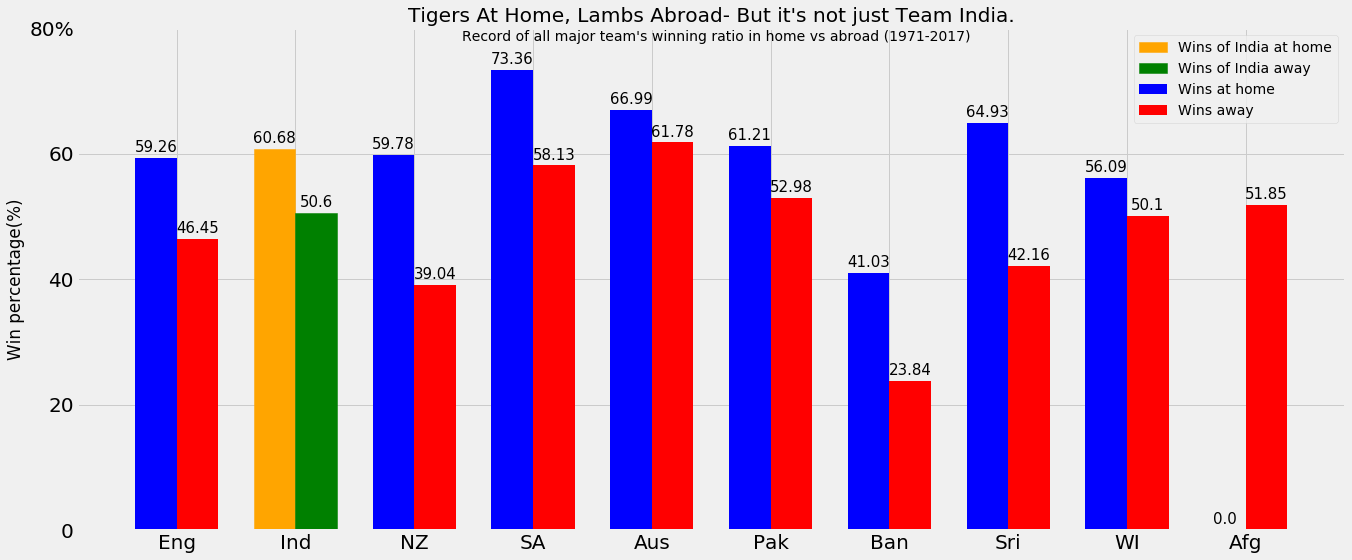

In [123]:
labels = ['Eng', 'Ind', 'NZ','SA', 'Aus', 'Pak', 'Ban', 'Sri', 'WI', 'Afg']

home_r = [eng_w_h_r, ind_w_h_r, nz_w_h_r, sa_w_h_r, aus_w_h_r, pak_w_h_r,
          ban_w_h_r, sri_w_h_r, wi_w_h_r, afg_w_h_r]

away_r = [eng_w_a_r, ind_w_a_r, nz_w_a_r, sa_w_a_r, aus_w_a_r,
          pak_w_a_r, ban_w_a_r, sri_w_a_r, wi_w_a_r, afg_w_a_r]

x = np.arange(len(labels))  
width = 0.35  

plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(19,8))

rects1 = ax.bar(x - width/2, home_r, width, label='Wins at home', color = 'b')
rects2 = ax.bar(x + width/2, away_r, width, label='Wins away', color = 'r')
rects1[1].set_color('orange')
rects2[1].set_color('green')
rects1[1].set_label('Wins of India at home')
rects2[1].set_label('Wins of India away')
ax.set_ylabel('Win percentage(%)')
ax.set_title("Tigers At Home, Lambs Abroad- But it's not just Team India." )
ax.text( s = "Record of all major team's winning ratio in home vs abroad (1971-2017)",
        x = 2.4, y = 78)

ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.set_yticks(range(0,100,20))
ax.set_yticklabels([0,20,40,60,"80%"])
ax.legend()


def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), fontsize = 15,
                    textcoords="offset points",
                    ha='center', va='bottom')


ax.legend()
autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

From the bar plot it is pretty clear that it is not just India, all the teams tends to do better at home than away. So far India has managed to achieve victory 50.6% of the times while playing abroad. Which seems better than many other countries. But is it better than the average?

# Pie Chart
With a pie chart I will try to see out of all the cricket matches mentioned in my data how many matches were won by the home team and how many were won by the away team. In this way I can find out the average winning ratio of away teams, and I can compare it with the winning ratio of the indian cricket team.

In [110]:
# Winner at home
df_winner_home = df[((df['Team_1'] == df['Host_Country']) | (df['Team_2'] == df['Host_Country'])) & (df['Winner'] == df['Host_Country'])]
df_winner_home.shape

(3028, 13)

In [117]:
# Number of winner at home
df_winner_home.shape[0]

3028

In [111]:
# Winner away
df_winner_away = df[((df['Team_1'] == df['Host_Country']) | (df['Team_2'] == df['Host_Country'])) & (df['Winner'] != df['Host_Country'])]
df_winner_away.shape

(2190, 13)

In [118]:
# Number of winner away
df_winner_away.shape[0]

2190

In [0]:
wh = df_winner_home.shape[0]
wa = df_winner_away.shape[0]

In [0]:
from matplotlib.patches import PathPatch
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

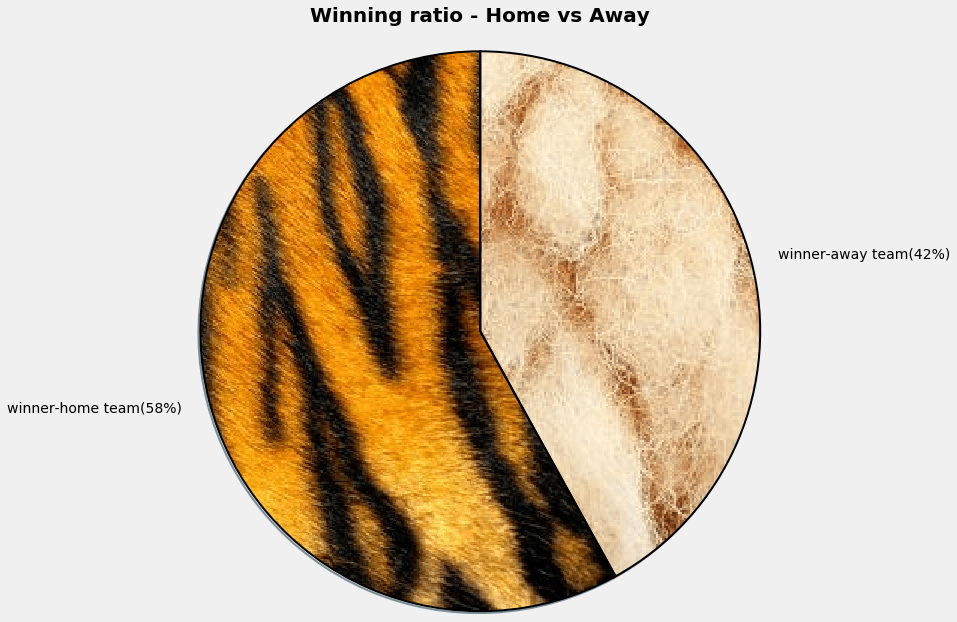

In [116]:
total = [wh, wa]
labels = ['winner-home team(58%)', 'winner-away team(42%)']

plt.title('Winning ratio - Home vs Away', x = 0.5, y = 1.8, fontweight = 'bold',
          fontsize = 20)
plt.gca().axis("equal")
pic = ['https://raw.githubusercontent.com/Ekram49/DS-Unit-1-Build/master/winner-home.png',
       'https://raw.githubusercontent.com/Ekram49/DS-Unit-1-Build/master/winner-away.png']
wedges, texts = plt.pie(total, startangle=90, labels=labels, radius = 3,
                        shadow = True,wedgeprops = 
                        { 'linewidth': 2, "edgecolor" :"k","fill":False,  })

def img_to_pie( fn, wedge, xy, zoom=1, ax = None):
    if ax==None: ax=plt.gca()
    im = plt.imread(fn, format='png')
    path = wedge.get_path()
    patch = PathPatch(path, facecolor='none')
    ax.add_patch(patch)
    imagebox = OffsetImage(im, zoom=zoom, clip_path=patch, zorder=-10)
    ab = AnnotationBbox(imagebox, xy, xycoords='data', pad=0, frameon=False)
    ax.add_artist(ab)
positions = [(-1,0.3),(0,-0.5)]
zooms = [1.5,2]

for i in range(2):
    fn = pic[i].format(pic[i].lower())
    img_to_pie(fn, wedges[i], xy=positions[i], zoom=zooms[i] )
    wedges[i].set_zorder(10)